In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this is use for keywords lookup 
from sklearn.feature_extraction.text import CountVectorizer

# dataset 1 - Amazon products
# https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view
file_data1 = r'C:\Users\mannu\jupyter\resources\amazon_products_data.csv'
df1 = pd.read_csv(file_data1)

# dataset 2 - shopify
# https://drive.google.com/file/d/1JVgy2yXUOREkzRdCeWjep626uvvF94pP/view
file_data2 = r"C:\Users\mannu\jupyter\resources\spotify_dataset.csv"
df2 = pd.read_csv(file_data2)

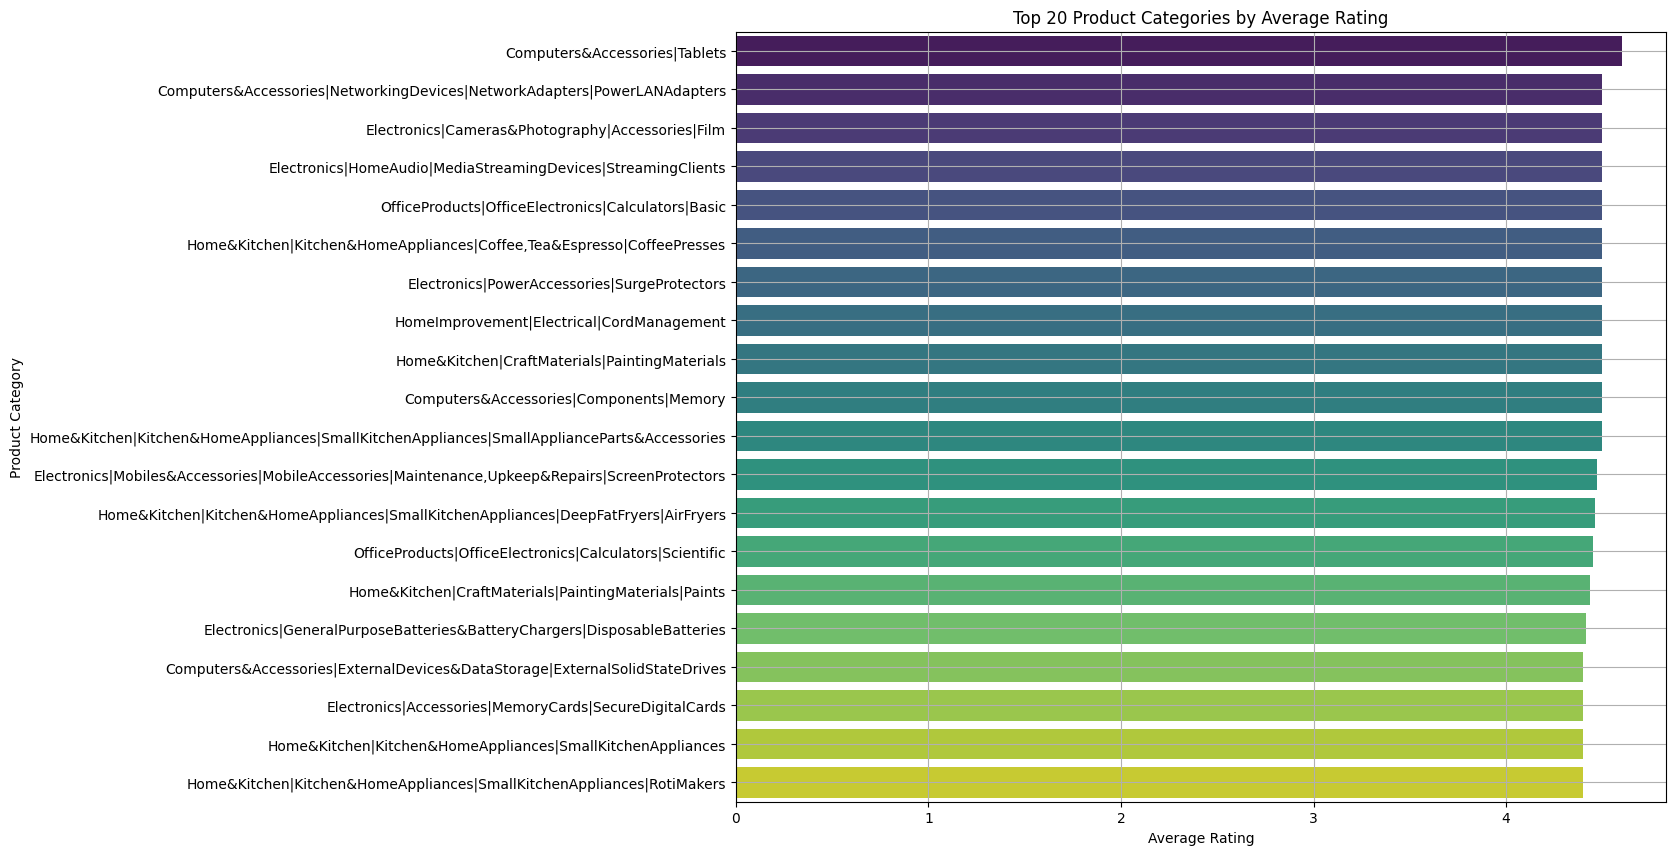

In [6]:
# 1. What is the average rating for each product category?

# Convert the 'rating' column to numeric, coercing errors to NaN
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')

# Calculate the average rating for each product category
average_ratings = df1.groupby('category')['rating'].mean().reset_index()

# Sort categories by average rating
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

# Optional: Limit to top N categories
top_n = 20  # You can change this value as needed
average_ratings = average_ratings.head(top_n)

# Visualization using a horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='rating', y='category', hue='category', data=average_ratings, palette='viridis')
plt.title('Top 20 Product Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.grid(True)
plt.show()

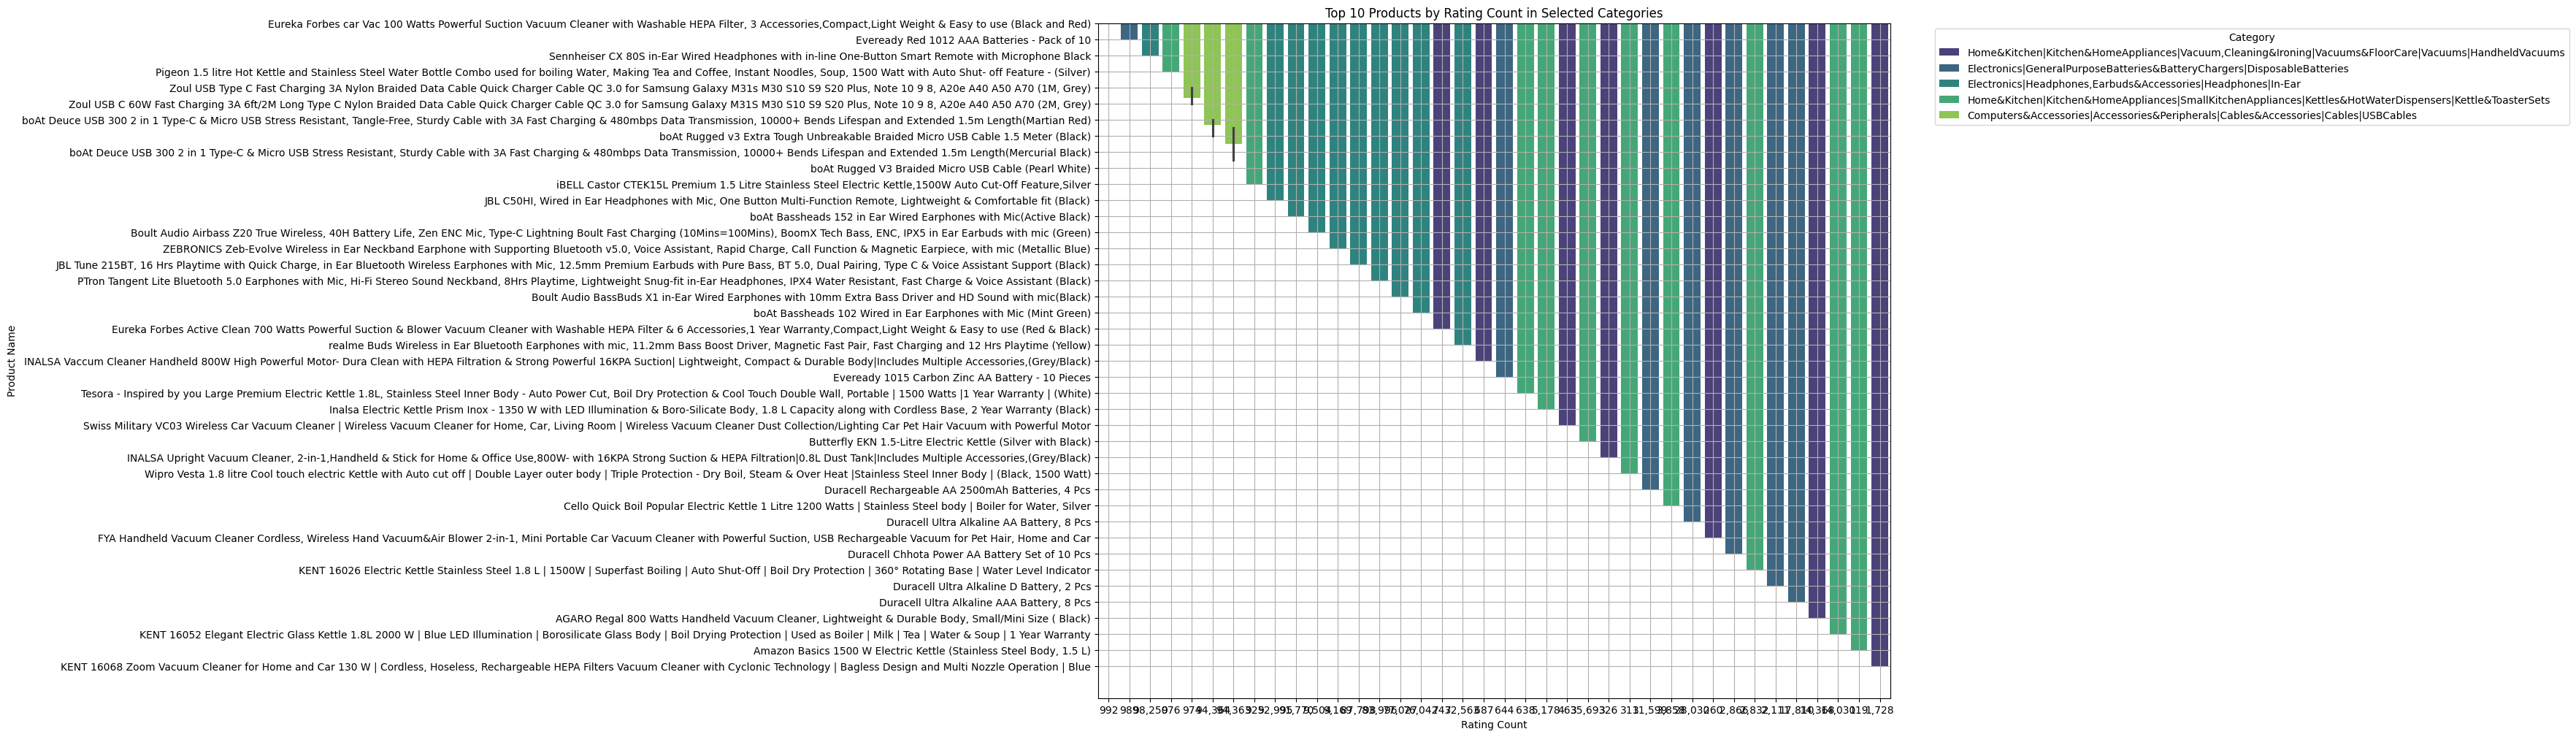

In [14]:
 # 2. What are the top rating_count products by category?
top_products_by_category = (
    df1.sort_values(by='rating_count', ascending=False)
    .groupby('category')
    .head(10)
    .reset_index(drop=True)
)
sample_categories = top_products_by_category['category'].unique()[:5]  # first 5 categories
subset_df = top_products_by_category[top_products_by_category['category'].isin(sample_categories)]

# horizontal bar plot for the subset
plt.figure(figsize=(14, 12))
sns.barplot(x='rating_count', y='product_name', hue='category', data=subset_df, palette='viridis')
plt.title('Top 10 Products by Rating Count in Selected Categories')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True)
plt.show()

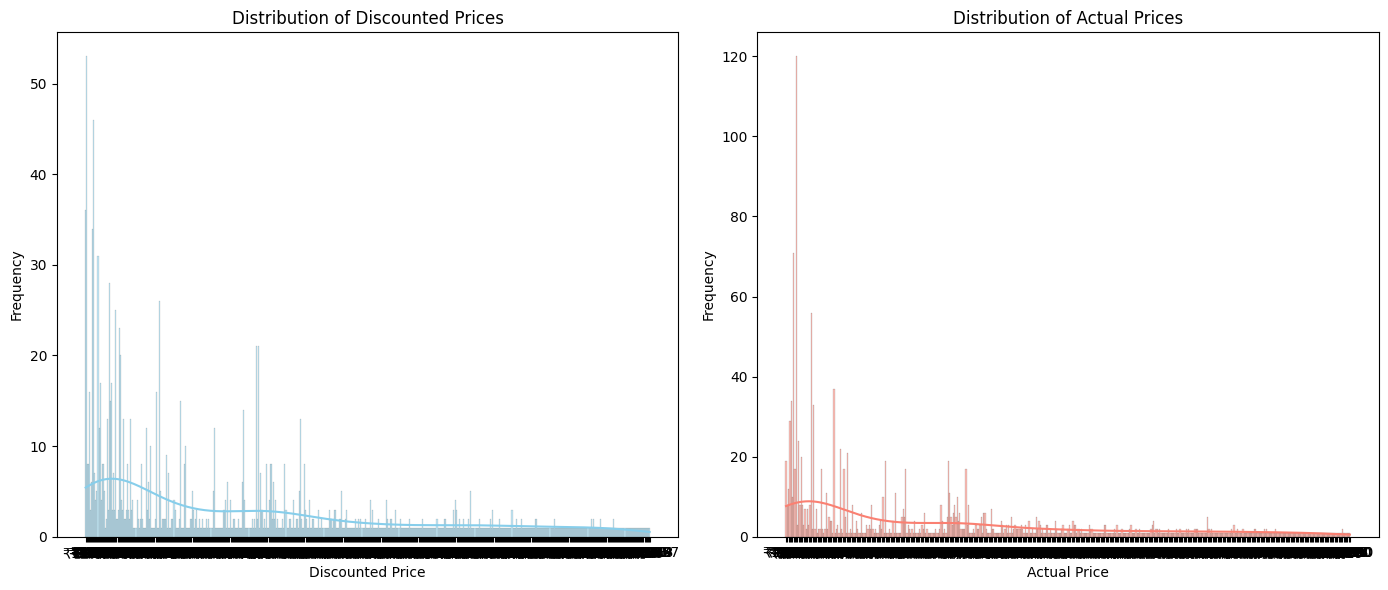

In [8]:
# 3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(14, 6))

# Histogram for discounted prices
plt.subplot(1, 2, 1)
sns.histplot(df1['discounted_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')

# Histogram for actual prices
plt.subplot(1, 2, 2)
sns.histplot(df1['actual_price'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

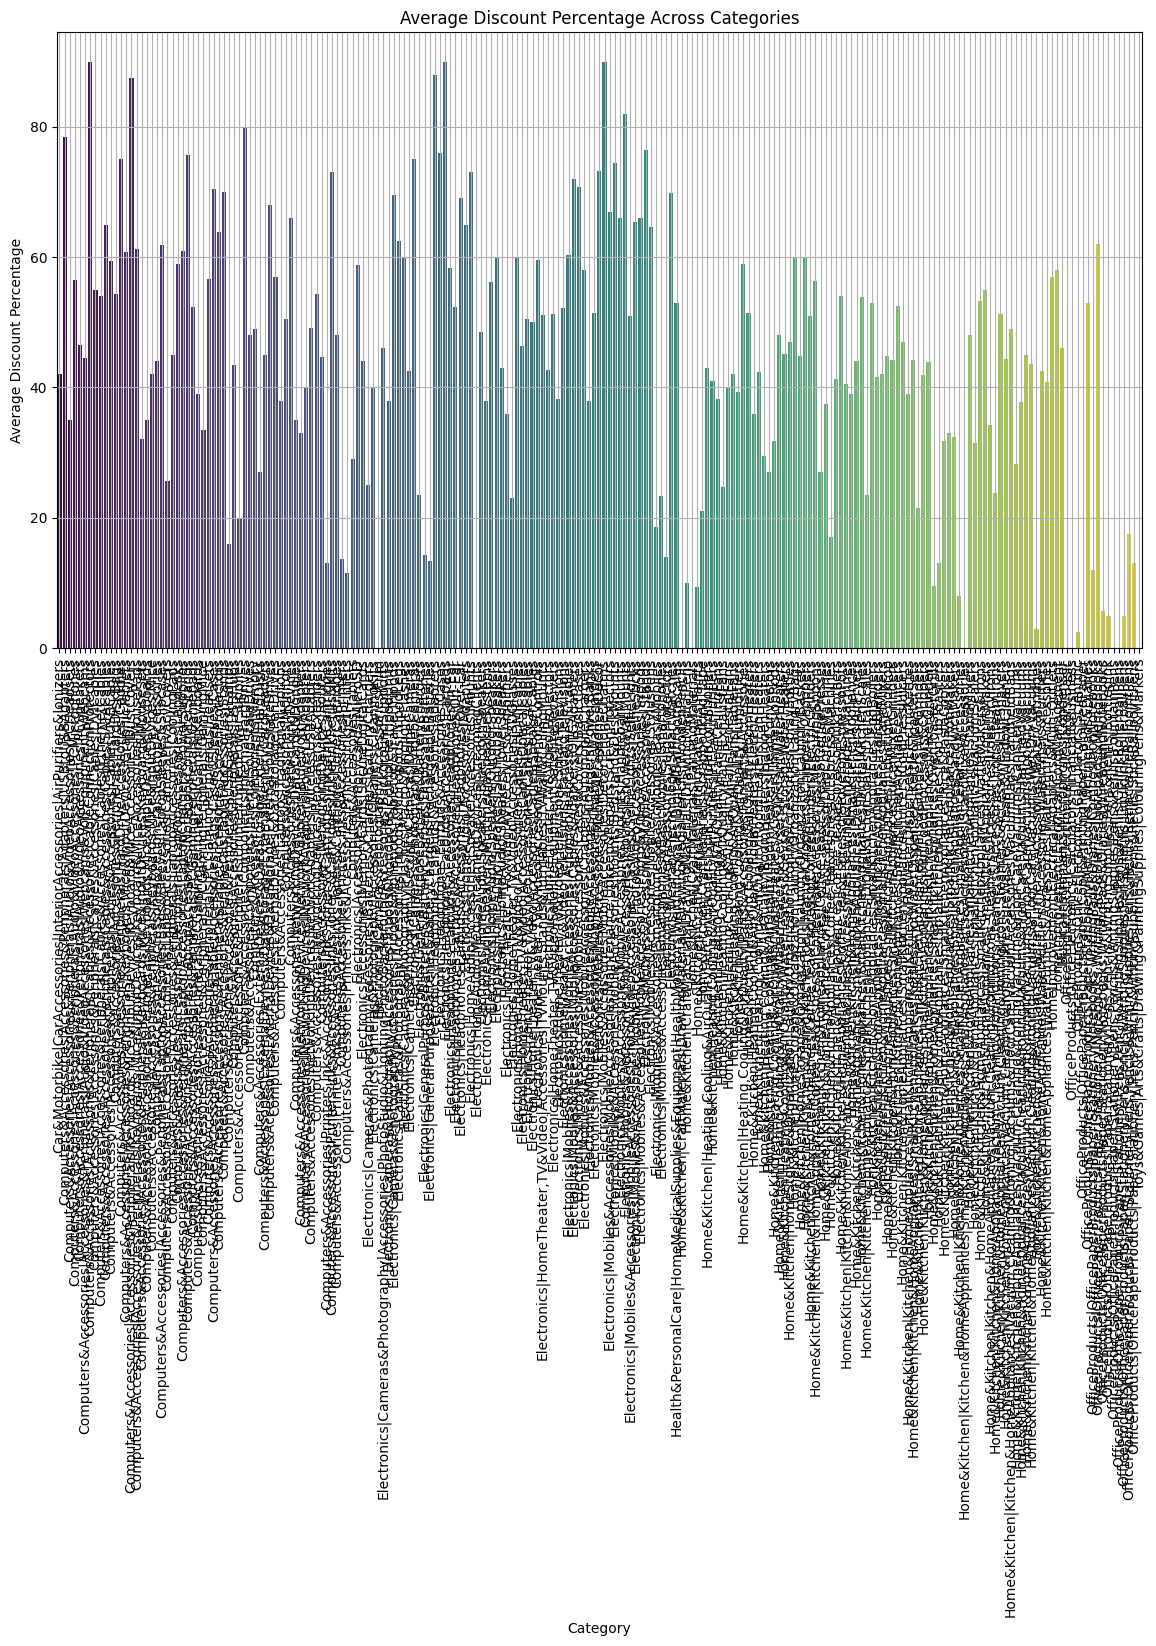

In [9]:
# 4.  How does the average discount percentage vary across categories?

df1['discount_percentage'] = df1['discount_percentage'].replace('%', '', regex=True).astype(float)
average_discount_percentage = df1.groupby('category')['discount_percentage'].mean().reset_index()
average_discount_percentage.columns = ['Category', 'Average Discount Percentage']
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Average Discount Percentage', hue='Category', data=average_discount_percentage, palette='viridis')
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()

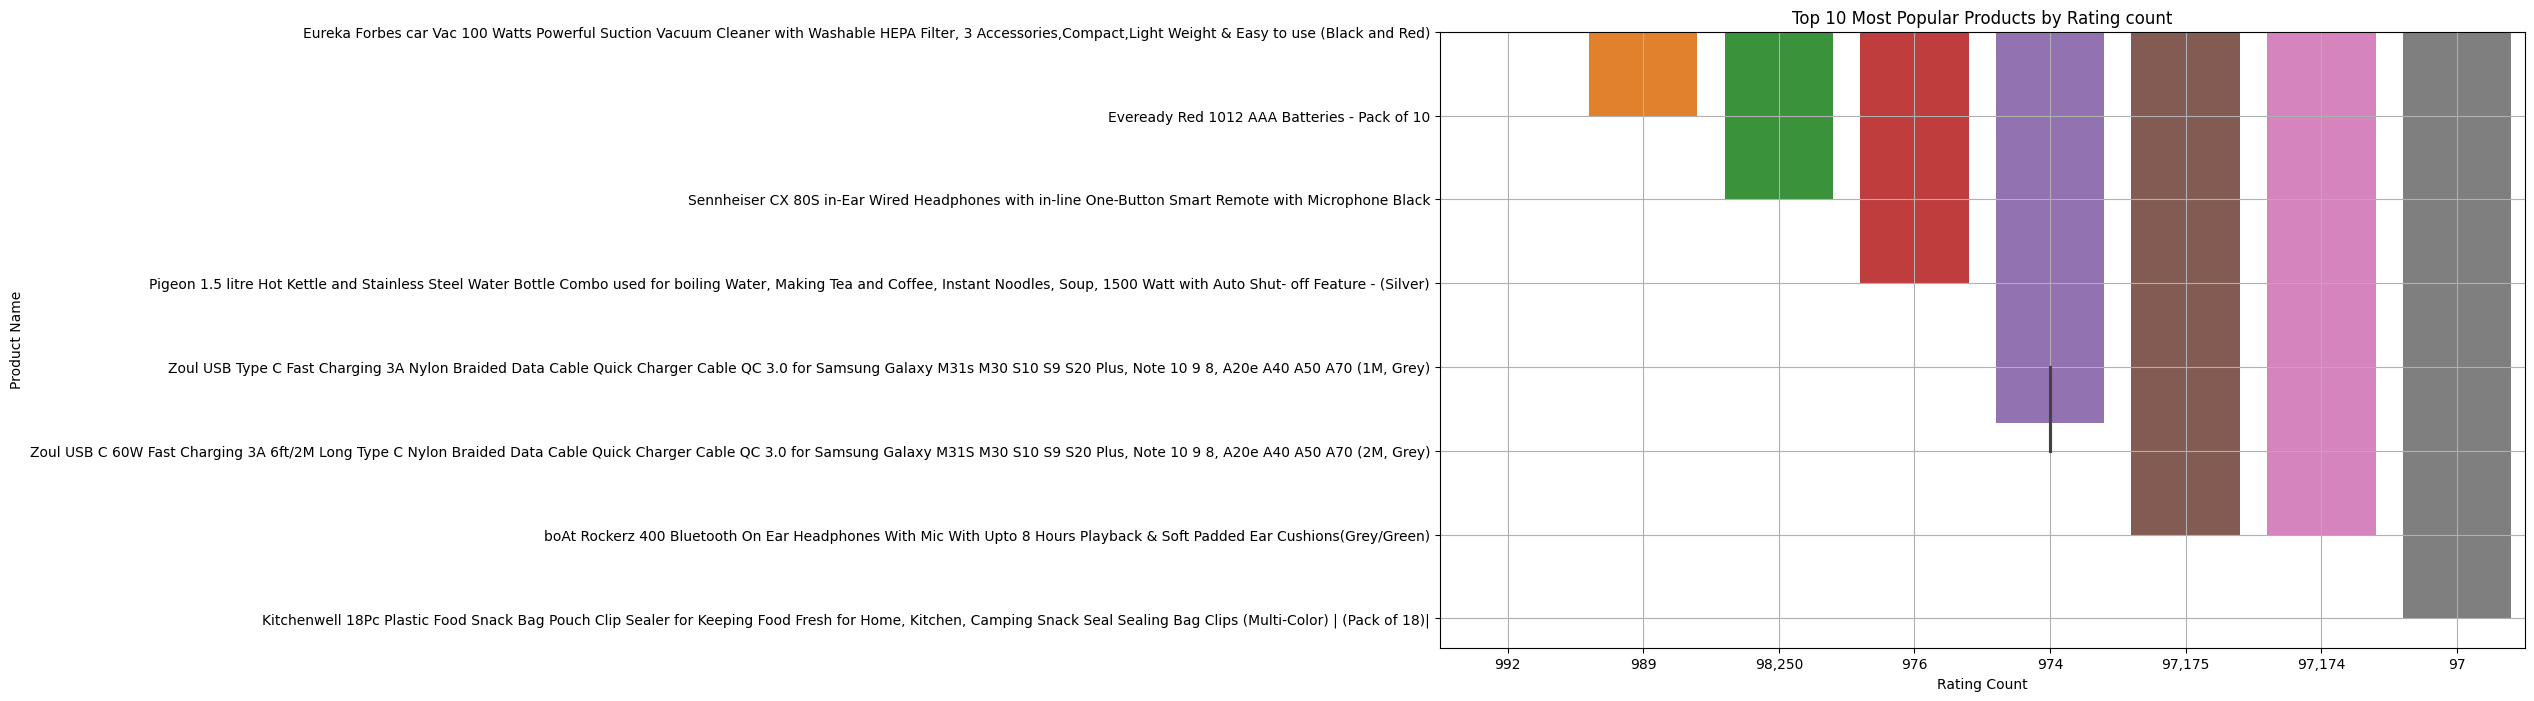

In [18]:
# 5.  What are the most popular product names?

most_popular = df1.sort_values(by='rating_count', ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.barplot(x='rating_count', y='product_name', hue='rating_count', data=most_popular)
plt.title('Top 10 Most Popular Products by Rating count')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

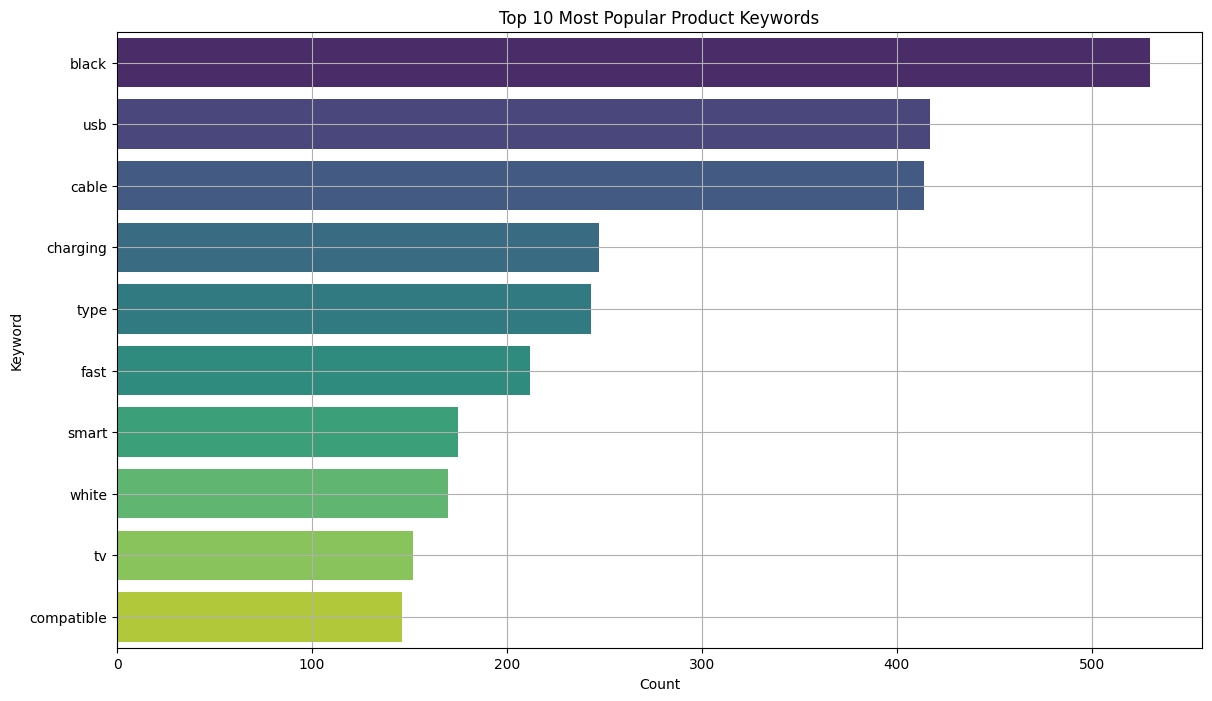

In [11]:
# 6. What are the most popular product keywords?

vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 1))
X = vectorizer.fit_transform(df1['product_name'])
sum_words = X.sum(axis=0)
keywords_df = pd.DataFrame({'keyword': vectorizer.get_feature_names_out(), 'count': sum_words.tolist()[0]})
keywords_df = keywords_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='keyword', hue='keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Most Popular Product Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.grid(True)
plt.show()

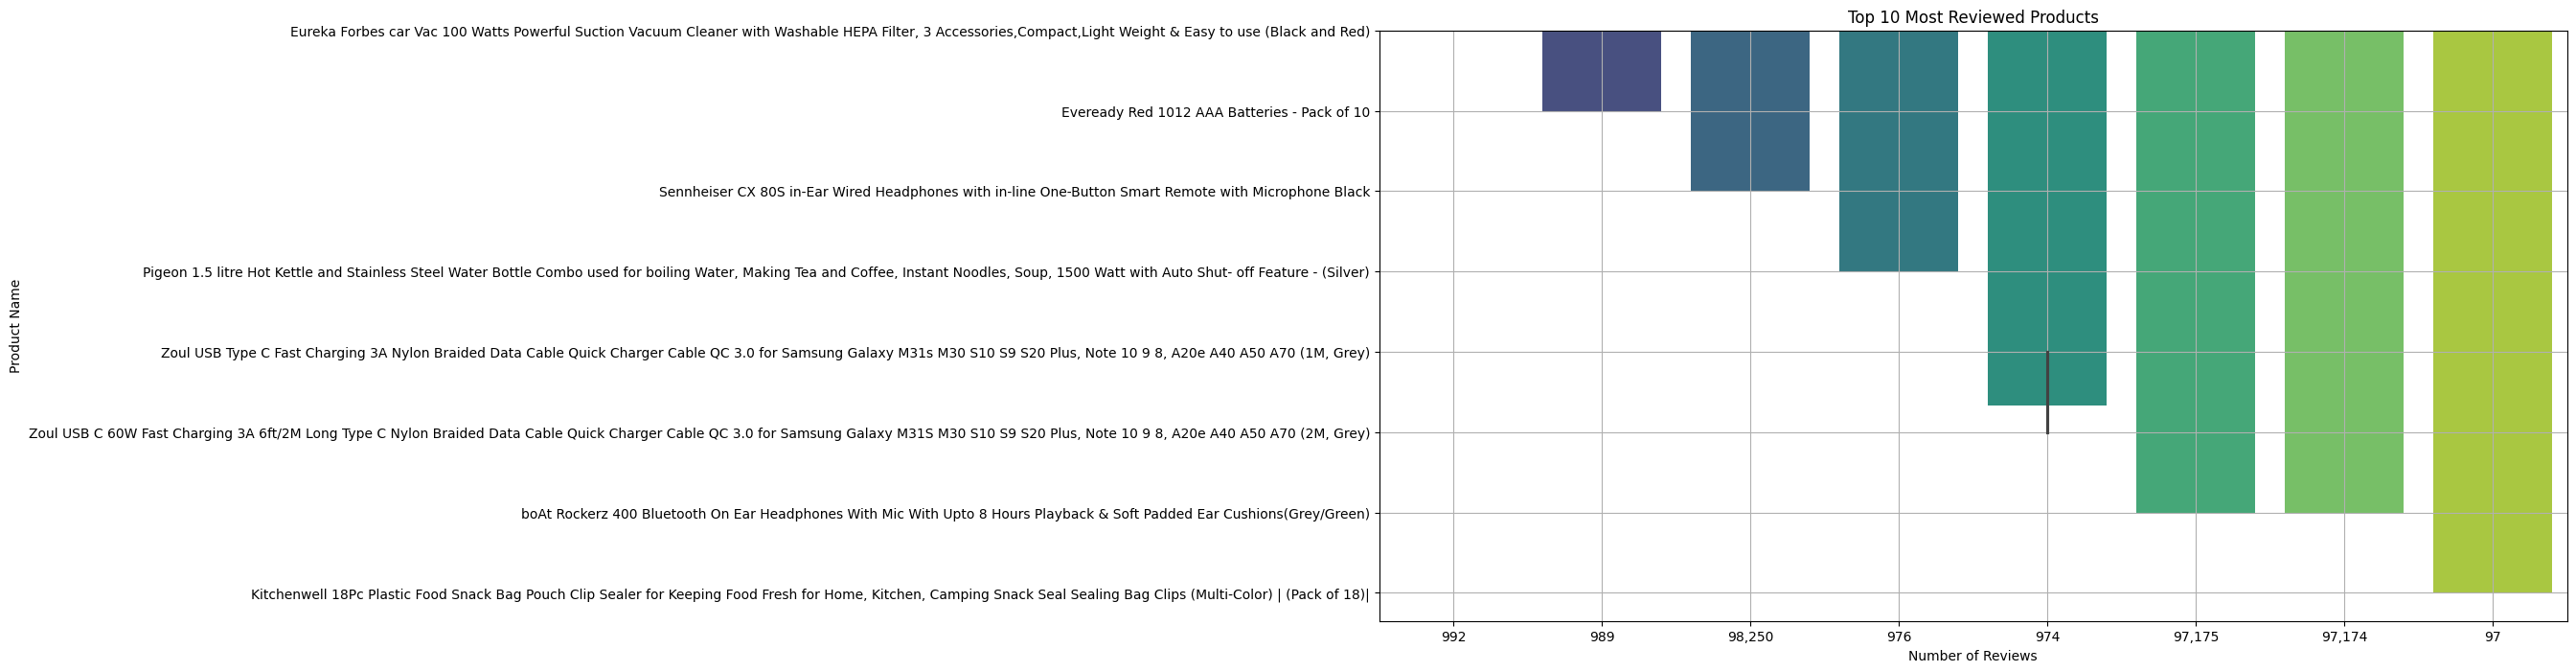

In [22]:
# 7. What are the most popular product reviews?
most_reviewed_products = df1.sort_values(by='rating_count', ascending=False).head(10)
plt.figure(figsize=(16, 8))
sns.barplot(x='rating_count', y='product_name', hue='rating_count', data=most_reviewed_products, palette='viridis')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

In [48]:
# 8. What is the correlation between discounted_price and rating?

df1['discounted_price'] = df1['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
# Drop rows with missing values in either column
df1.dropna(subset=['discounted_price', 'rating'], inplace=True)

# Calculate the correlation between discounted_price and rating
correlation = df1[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f'Correlation between discounted_price and rating: {correlation:.2f}')


Correlation between discounted_price and rating: 0.12


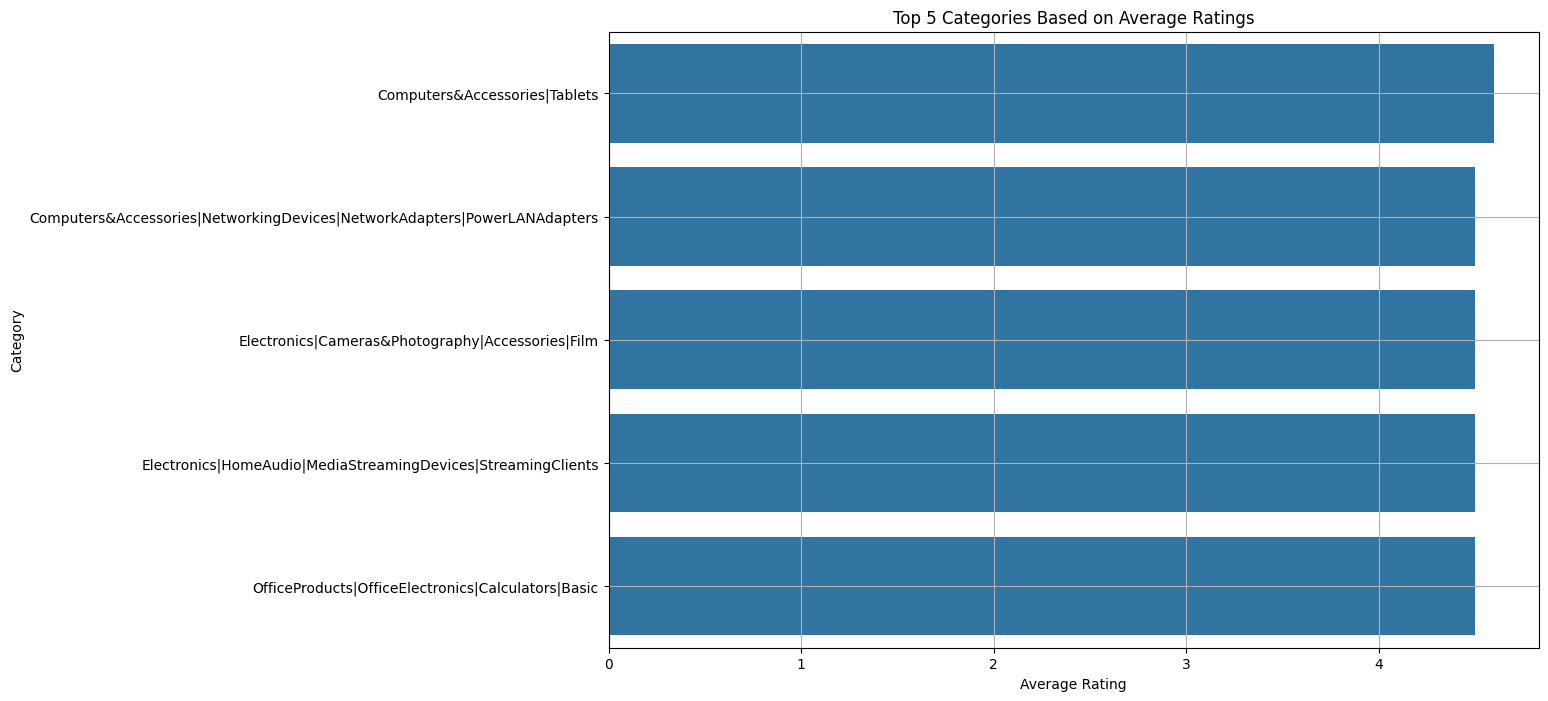

In [60]:
# 9. What are the Top 5 categories based on the highest ratings?

average_ratings_by_category = df1.groupby('category')['rating'].mean()
sorted_categories = average_ratings_by_category.sort_values(ascending=False)
top_5_categories = sorted_categories.head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_categories.values, y=top_5_categories.index)
plt.title('Top 5 Categories Based on Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.grid(True)
plt.show()

In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
# Ans: we can improve more this data using different approach

# Category Naming:-
# Issue: Long and unreadable category names.
# Improvement: Shorten and simplify category names for better readability.

# Discount Percentage:-
# Issue: Percent symbols in the discount_percentage column.
# Improvement: Remove percent symbols since the column name already indicates percentage values.

# Rating:-
# Issue: Potential for missing values (NA) in the rating column.
# Improvement: Handle or remove missing values to ensure data consistency.

# Rating Count:-
# Issue: Formatting with commas in the rating_count column.
# Improvement: Maintain the column as integers for data processing and apply formatting only during visualization for readability.

In [ ]:
# ------------------------------------dataset 2 - shopify------------------------------

In [72]:
# 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
#  Handle missing values and remove duplicate rows if necessary.

# df2 already loaded in starting for more optimize
# removing duplicate rows
df2 = df2.drop_duplicates()

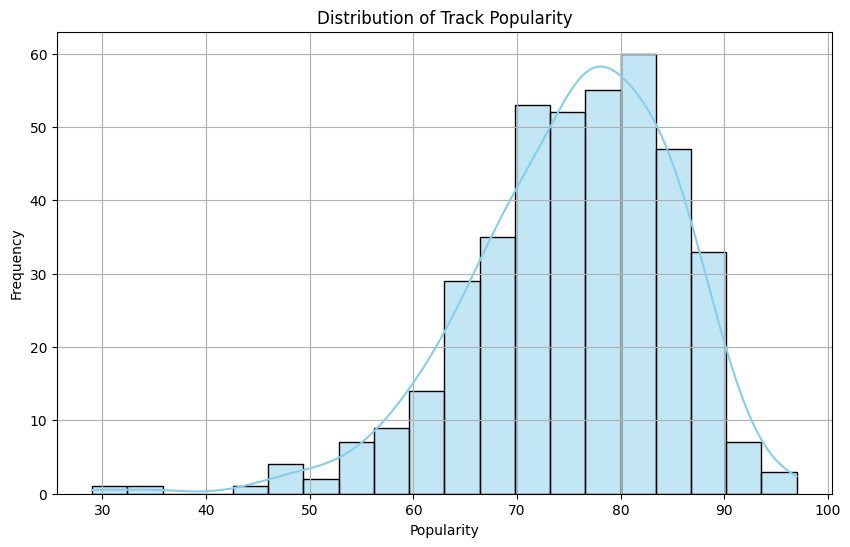

In [74]:
# 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(df2['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

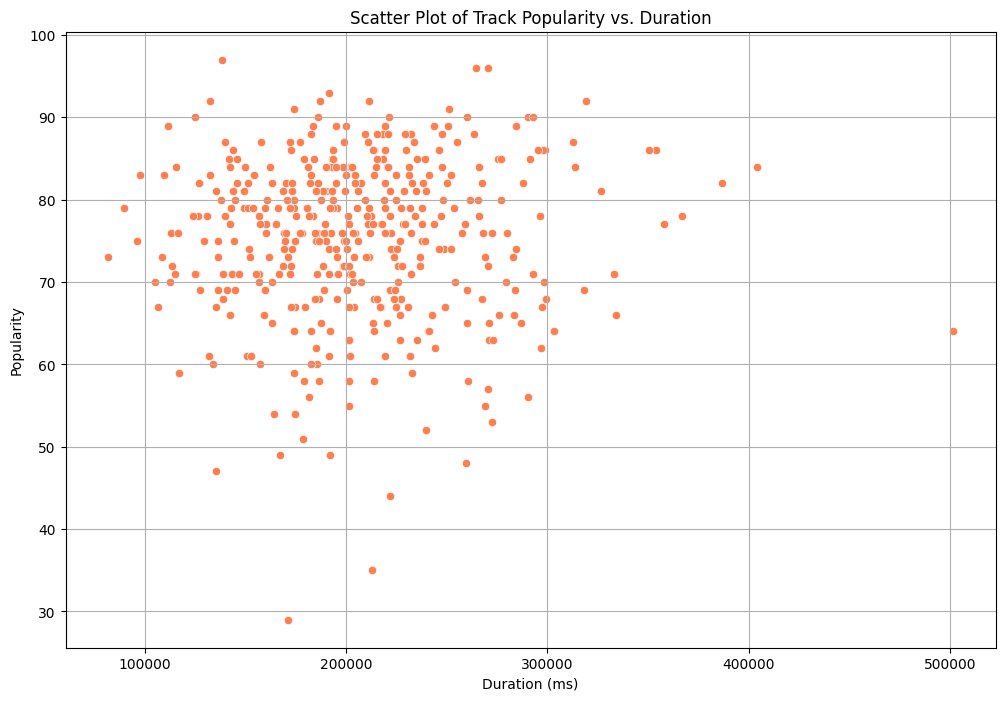

In [75]:
# 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

# Plot the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df2, color='coral')
plt.title('Scatter Plot of Track Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

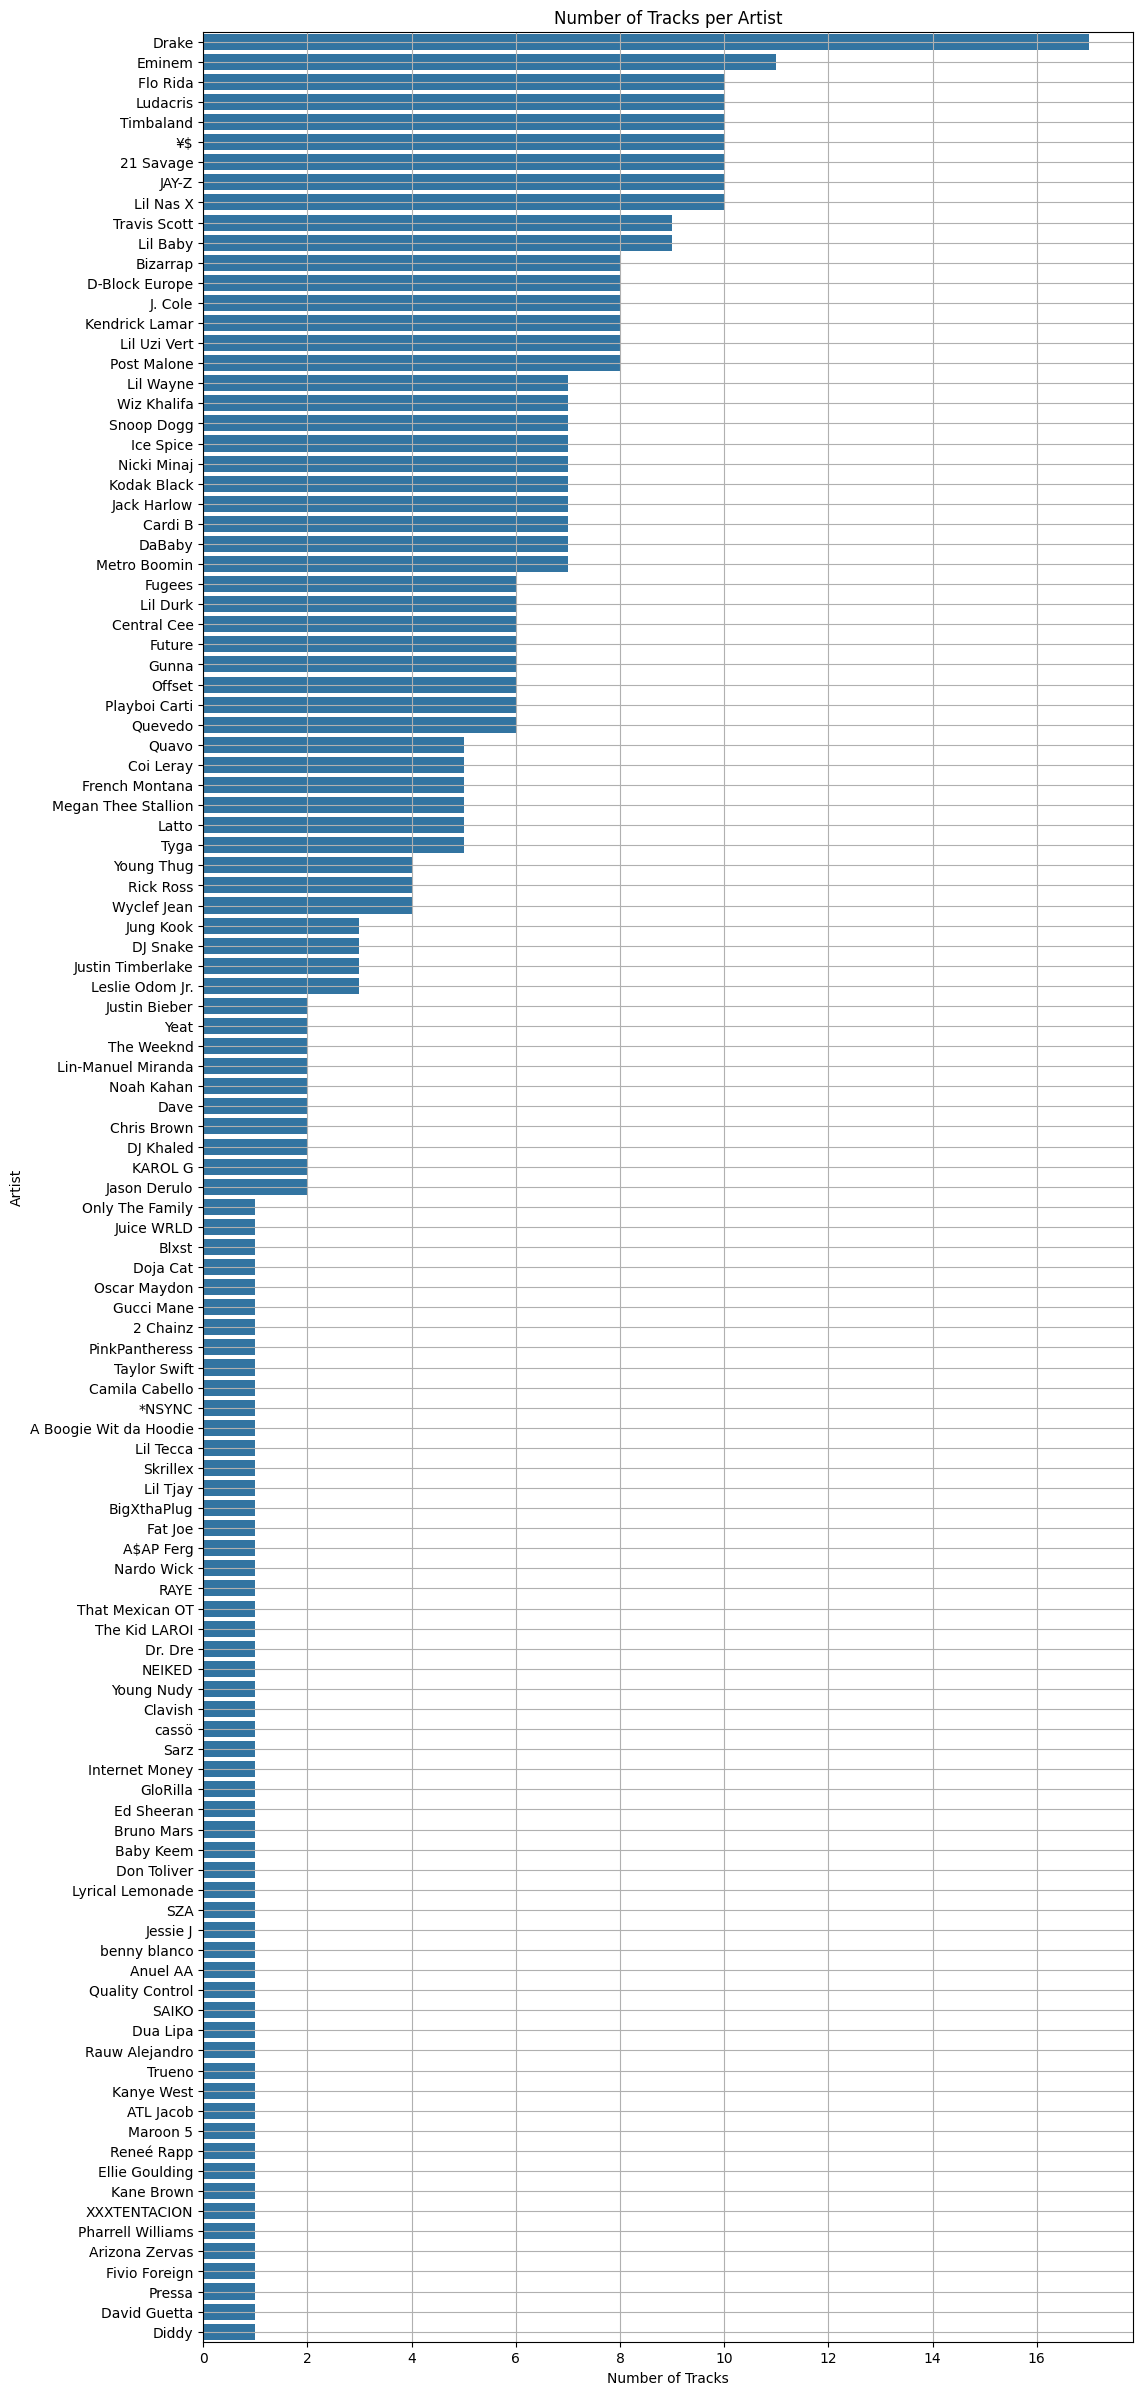

In [86]:
# 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
# using a countplot.

track_counts = df2['Artist'].value_counts()
track_counts_df = track_counts.reset_index()
track_counts_df.columns = ['Artist', 'Number of Tracks']
plt.figure(figsize=(12, 30))
sns.barplot(x='Number of Tracks', y='Artist', data=track_counts_df)
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

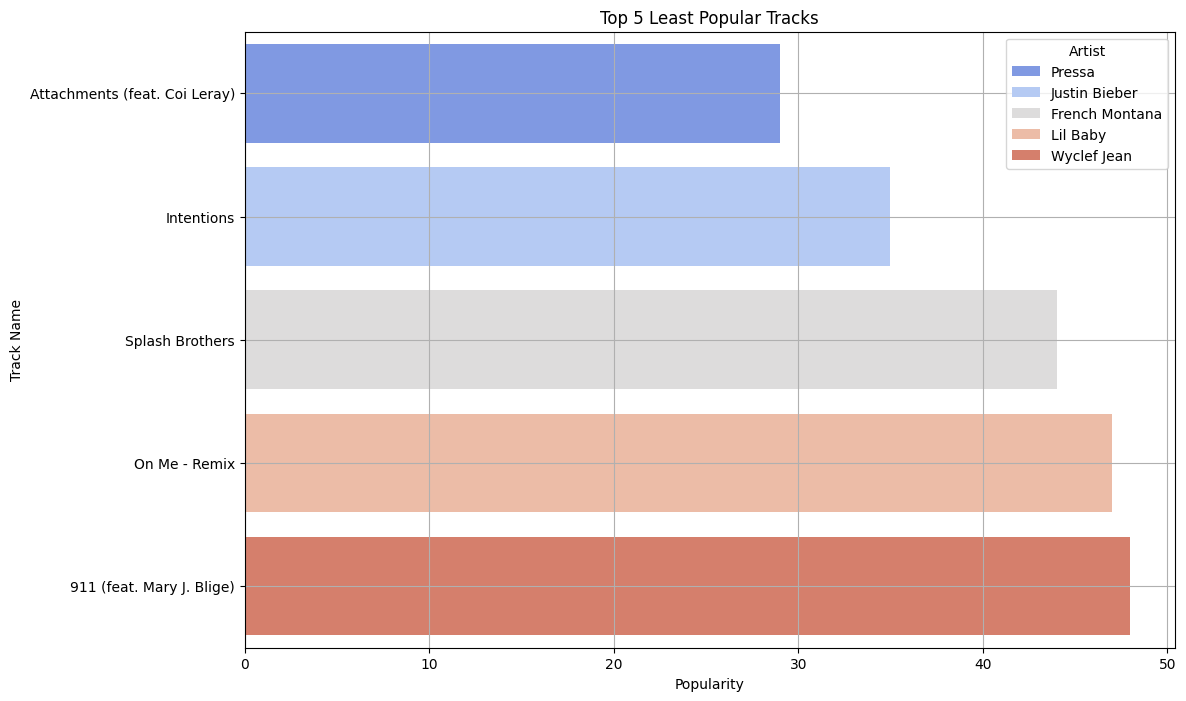

In [88]:
# 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Find the top 5 least popular tracks
least_popular_tracks = df2.nsmallest(5, 'Popularity')
# Create a DataFrame for plotting
least_popular_tracks_df = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Popularity', y='Track Name', hue='Artist', data=least_popular_tracks_df, palette='coolwarm')
plt.title('Top 5 Least Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.grid(True)
plt.show()

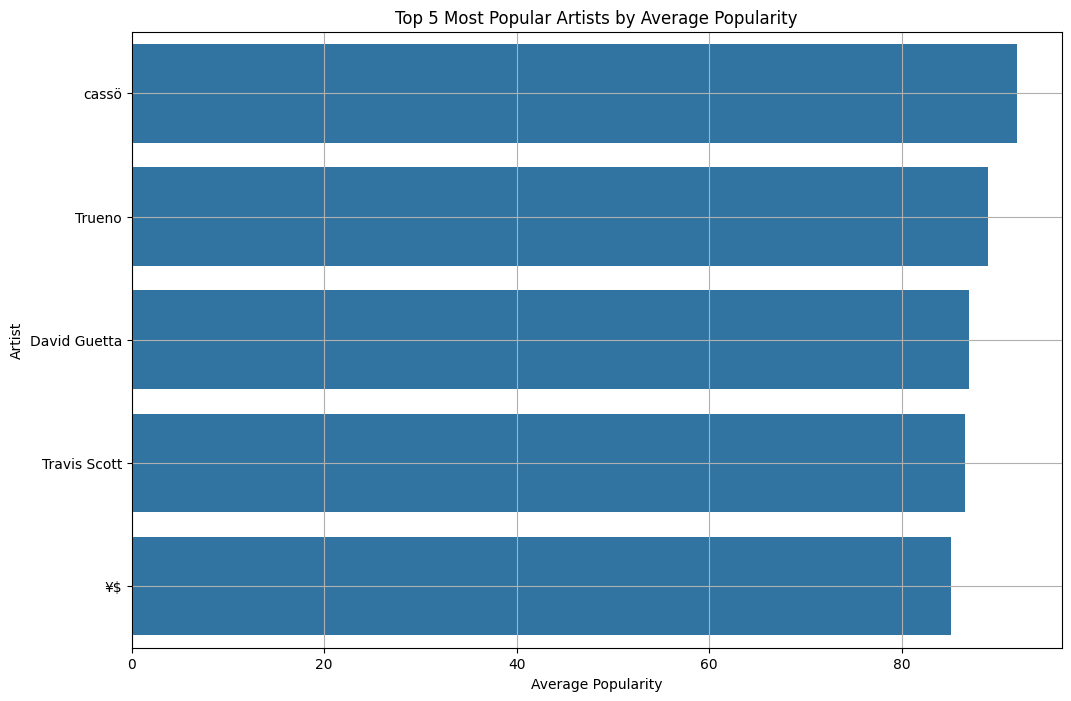

In [94]:
# 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

# Calculate the average popularity for each artist
artist_avg_popularity = df2.groupby('Artist')['Popularity'].mean()

# Find the top 5 most popular artists by average popularity
top_5_artists = artist_avg_popularity.nlargest(5)

# Create a DataFrame for plotting
top_5_artists_df = top_5_artists.reset_index()
top_5_artists_df.columns = ['Artist', 'Average Popularity']

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Popularity', y='Artist', data=top_5_artists_df)
plt.title('Top 5 Most Popular Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

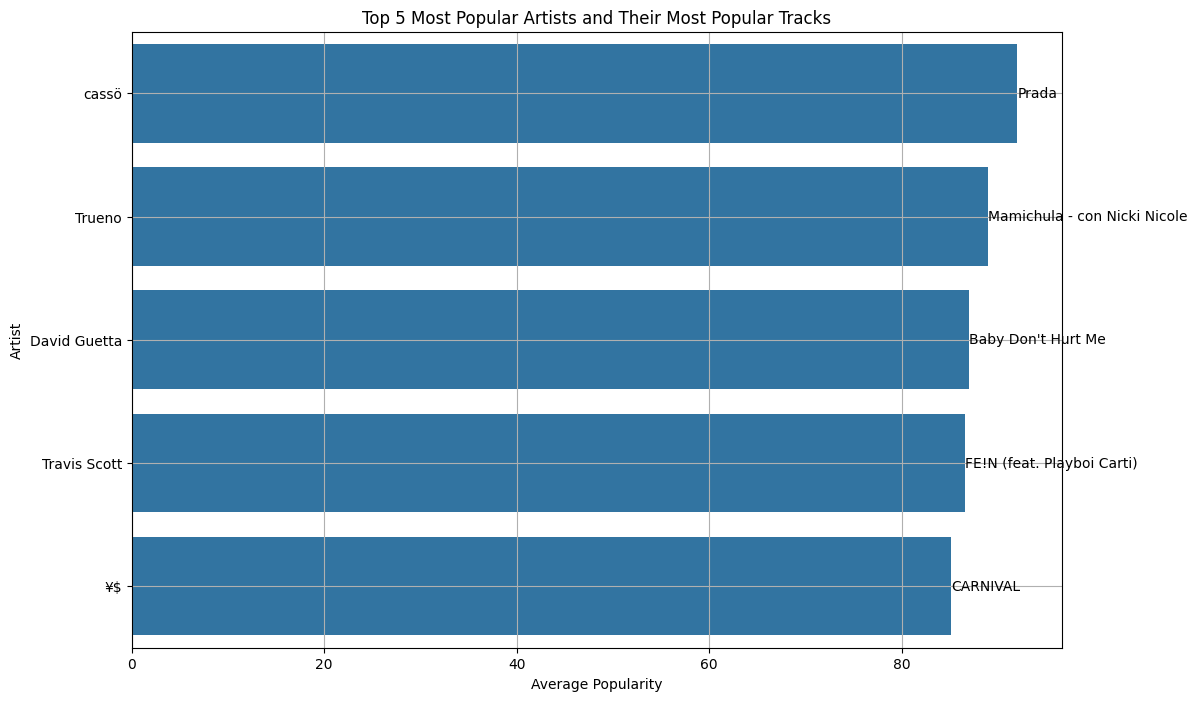

In [101]:
# 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Calculate the average popularity for each artist
artist_avg_popularity = df2.groupby('Artist')['Popularity'].mean()

# Find the top 5 most popular artists by average popularity
top_5_artists = artist_avg_popularity.nlargest(5).index

# Filter tracks for these top 5 artists
top_5_artists_tracks = df2[df2['Artist'].isin(top_5_artists)]

# For each artist, find the most popular track(s)
most_popular_tracks = {}
for artist in top_5_artists:
    artist_tracks = top_5_artists_tracks[top_5_artists_tracks['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Convert the results into a DataFrame for plotting
most_popular_tracks_df = pd.DataFrame(list(most_popular_tracks.items()), columns=['Artist', 'Most Popular Track'])

# Add average popularity for visualization
most_popular_tracks_df['Average Popularity'] = artist_avg_popularity.loc[most_popular_tracks_df['Artist']].values

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Popularity', y='Artist', data=most_popular_tracks_df)

for index, value in enumerate(most_popular_tracks_df['Average Popularity']):
    plt.text(value, index, most_popular_tracks_df['Most Popular Track'].iloc[index], va='center')

plt.title('Top 5 Most Popular Artists and Their Most Popular Tracks')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.grid(True)
plt.show()

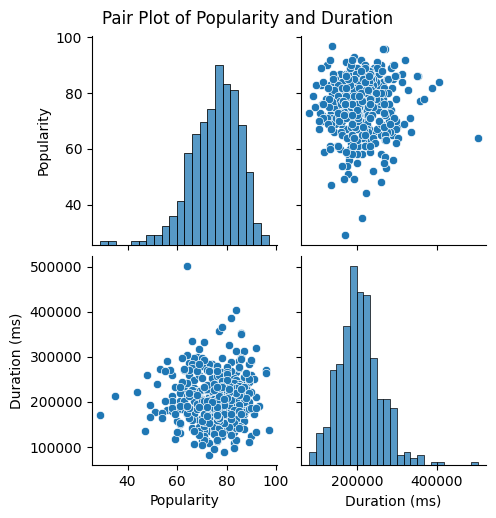

In [105]:
# 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

numerical_columns = ['Popularity', 'Duration (ms)']

# Create a pair plot
sns.pairplot(df2[numerical_columns])
plt.suptitle('Pair Plot of Popularity and Duration', y=1.02) 
plt.show()

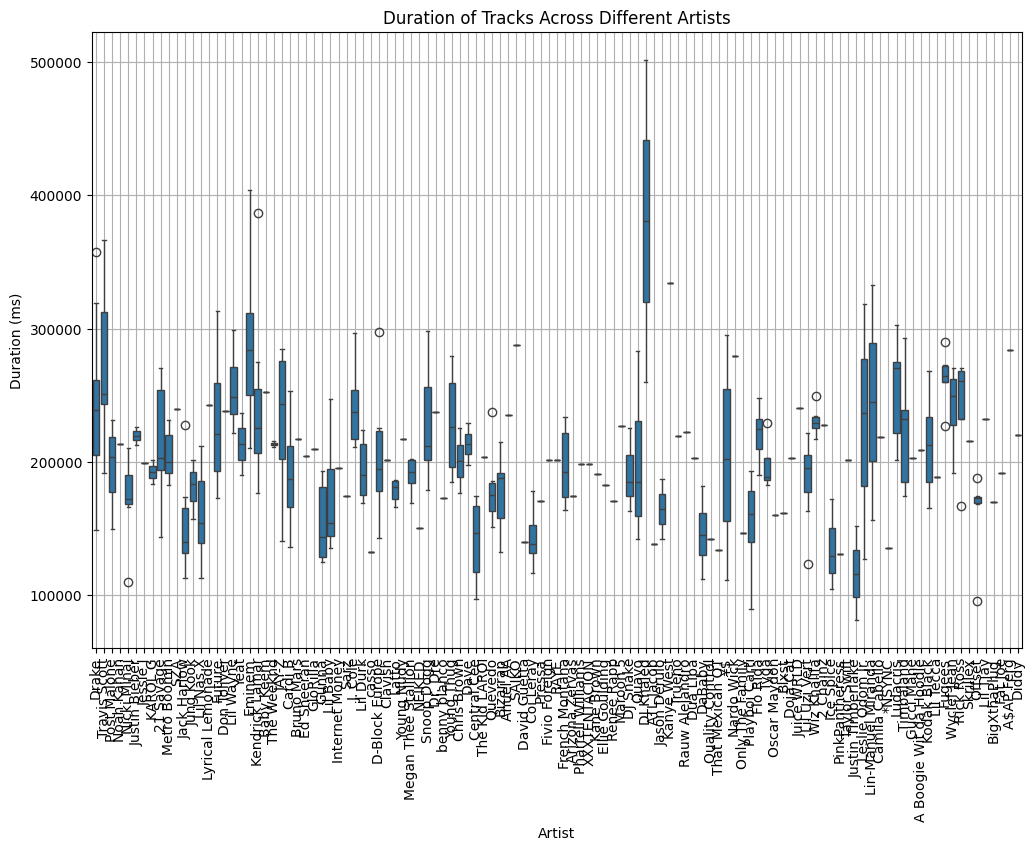

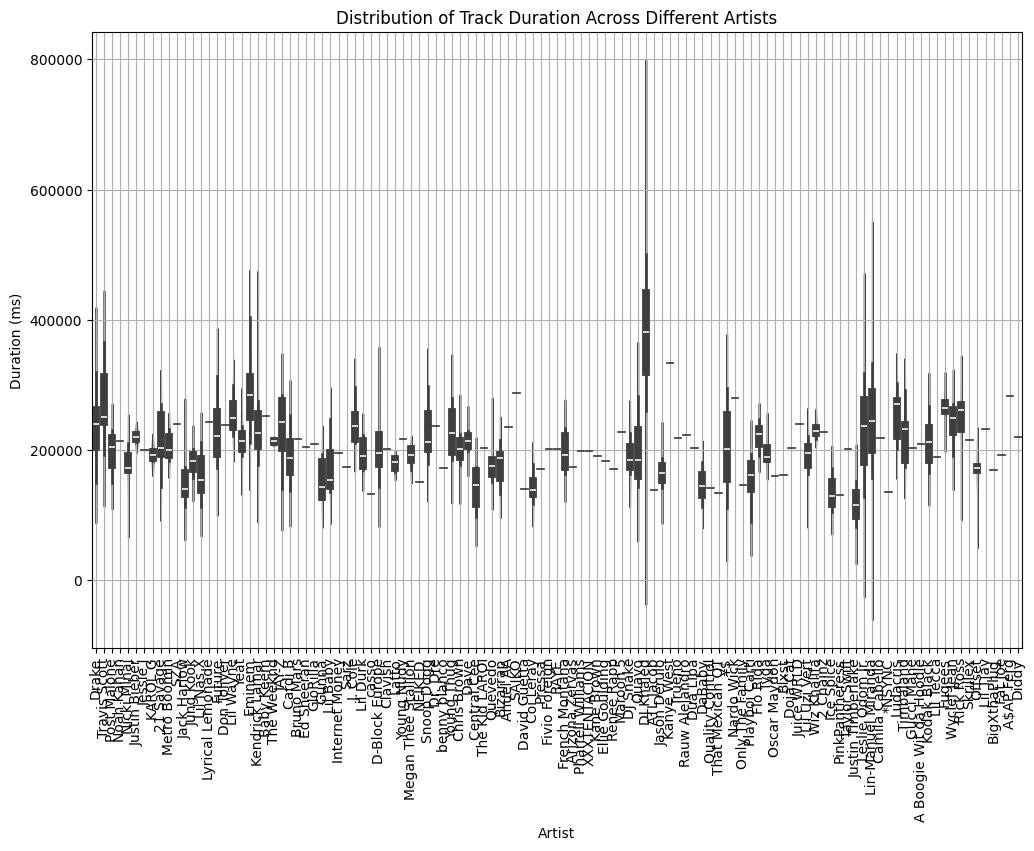

In [111]:
# 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# box plot 
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df2)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.grid(True)
plt.show()

# violin plot 
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df2)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Track Duration Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.grid(True)
plt.show()

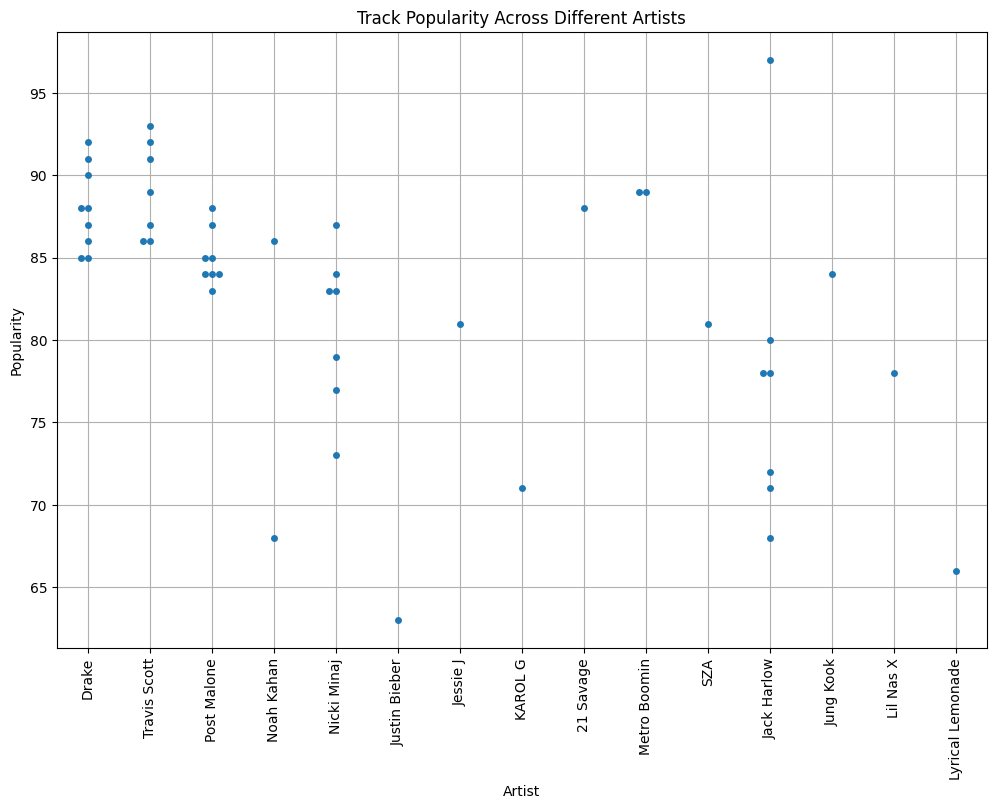

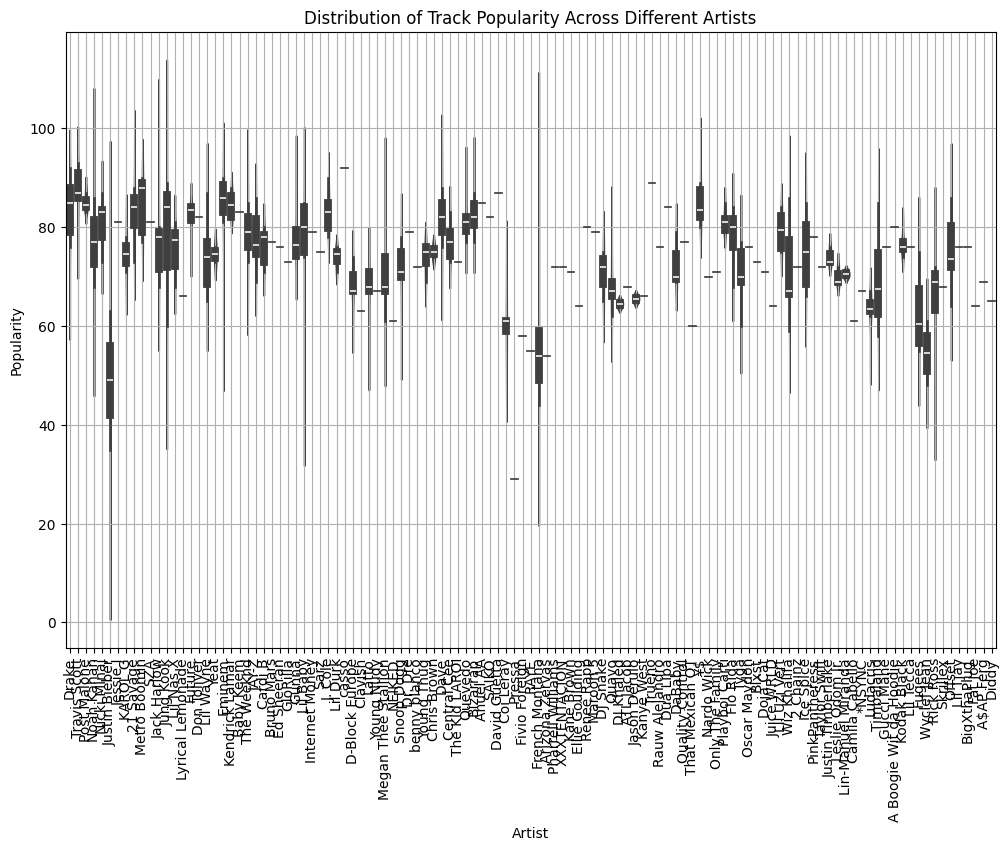

In [115]:
# 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# swarmplot 
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Artist', y='Popularity', data=df2[:50])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Track Popularity Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# violinplot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=df2)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Track Popularity Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()